In [ ]:
'''TO BEGIN:


EVERYTHING THAT IS COMMENTED OUT WAS LIKE VALIDATION TECHNIQUES OR TESTING OF OTHER METHODOLOGIES. THE FINAL CODE THAT IS UNCOMMENTED
IS WHAT IS USED FOR THE FINAL MODEL AND STUFF. YOU CAN PROBS UNCOMMENT THINGS AND TEST THINGS OUT HERE, BUT THIS JUPYTER NOTEBOOK
IS WHAT WAS USED TO CREATE THE RANDOM FOREST MODEL HERE

'''

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import shap


import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap



In [2]:
data = pd.read_csv("NIPALS_18_model_input.csv")

In [3]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,match
0,-3.376009,0.951507,0.700526,0.088119,1.625146,0.359158,2.560785,-0.337054,0.820194,-1.606818,-0.319837,-0.012722,-1.695940,0.954603,-0.455161,0.829910,-0.305608,1.310504,1
1,0.088928,2.275773,1.029325,0.982228,-3.604352,0.021483,1.911871,0.977561,0.879590,0.951192,0.022734,0.878927,1.027662,-0.368899,-0.193778,0.466959,-0.289714,0.108721,1
2,-1.207411,1.477435,0.470917,1.377526,-0.558686,-1.618953,2.803216,-0.141668,-0.017614,0.229820,-2.364790,0.628125,-0.038277,-0.576336,1.507062,-0.322833,-0.053969,-2.115494,0
3,2.322736,0.620138,-0.167692,-1.063947,-2.772008,-0.800453,-1.000137,-2.618444,0.765789,0.290674,1.412505,0.907232,-1.234227,1.029879,1.120553,-0.413050,-1.397024,0.122681,0
4,-0.613118,1.474497,-1.043185,0.070875,0.014545,1.504754,0.837139,-0.700047,0.560040,0.268020,1.639724,1.465575,0.502324,-0.527661,0.471198,-0.824323,0.100862,-0.331577,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,0.709123,-2.929197,-2.556089,-1.318441,-0.418276,-1.217614,2.041580,0.447463,0.170580,0.344127,1.566491,-0.104401,0.250707,-1.546499,1.810036,1.419084,0.138530,0.381133,0
2756,0.041926,-1.578718,-1.710294,-0.212926,-0.434371,0.161911,1.242949,-0.560756,-1.950466,2.514101,-1.417091,0.421816,-0.883063,0.443270,0.546273,0.026349,-2.167245,0.752885,1
2757,1.457759,-1.524419,0.936662,-0.298670,1.408203,-0.898055,0.585386,-1.308234,0.036322,1.602505,-0.512173,-0.047378,0.477273,-1.267641,0.043018,-0.365393,-1.495641,-0.519565,1
2758,-1.380635,0.380978,1.962311,0.473659,-2.255564,1.136629,0.476562,-0.613203,-0.740470,0.562409,-0.889117,0.979554,0.916684,-0.747171,-0.611067,0.041170,-0.876033,-0.366943,1


In [4]:
'''LOOKING INTO MODELLING - PRINCIPAL COMPONENTS AS INPUT DATA - X'''

selected_features = [
    'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'
]

X = data[selected_features]
y = data['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [47]:
# LOOKING INTO MODELLING - RAW DATA AS INPUT DATA - X

'''
selected_features = [
    'age', 'age_o', 'd_age', 'samerace', 'importance_same_race',
    'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
    'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
    'pref_o_shared_interests', 'attractive_o', 'sinsere_o',
    'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
    'attractive_important', 'sincere_important', 'intellicence_important',
    'funny_important', 'ambtition_important', 'shared_interests_important',
    'attractive', 'sincere', 'intelligence', 'funny', 'ambition',
    'attractive_partner', 'sincere_partner', 'intelligence_partner',
    'funny_partner', 'ambition_partner', 'shared_interests_partner',
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
    'music', 'shopping', 'yoga', 'interests_correlate',
    'expected_happy_with_sd_people', 'expected_num_matches', 'like',
    'guess_prob_liked', 'met', 'gender_female', 'gender_male',
    'race_asian/pacific islander/asian-american',
    'race_black/african american', 'race_european/caucasian-american',
    'race_latino/hispanic american', 'race_other', 'race_nan',
    'race_o_asian/pacific islander/asian-american',
    'race_o_black/african american', 'race_o_european/caucasian-american',
    'race_o_latino/hispanic american', 'race_o_other', 'race_o_nan',
    'field_business_&_finance', 'field_creative_arts', 'field_education',
    'field_engineering_&_technology', 'field_healthcare',
    'field_humanities', 'field_law_&_public policy',
    'field_mathematics_&_statistics', 'field_natural_&_physical_sciences',
    'field_other', 'field_social_sciences'
]

X = data[selected_features]
y = data['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
'''

In [ ]:
'''GOING INTO DIFFERENT MODELS USED'''

In [5]:
#USING LOGISTIC REGRESSION AS A MODEL TO TEST

'''
#THIS GIVES THE TRAINING AND VALIDATION ACCURACY OF THE LOGISTIC REGRESSION MODEL
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))
'''

Training Accuracy: 0.8318553888130968
Validation Accuracy: 0.8349244232299124


In [191]:
#THIS IS CROSS-VALIDATING WHAT THE VALIDATION ACCURACY SHOULD BE AROUND WITH ANOTHER METHOD

'''
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))
'''

Cross-validation accuracy: 0.78 ± 0.02


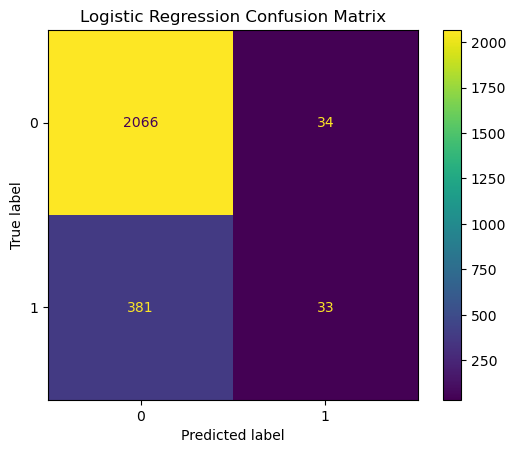

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2100
           1       0.49      0.08      0.14       414

    accuracy                           0.83      2514
   macro avg       0.67      0.53      0.52      2514
weighted avg       0.79      0.83      0.78      2514



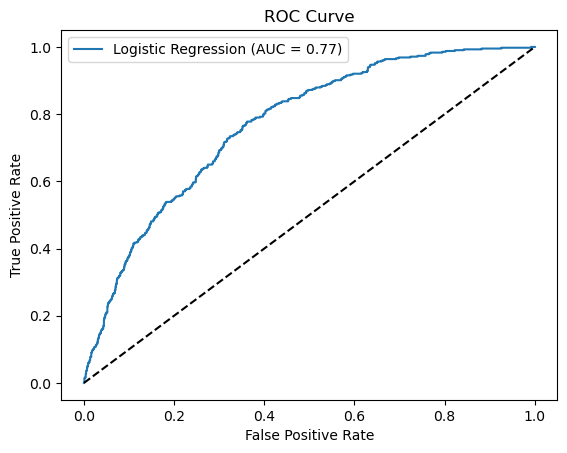

In [40]:
# PLOTS CONFUSION MATRIX AND ROC CURVE FOR LOGISTIC REGRESSION

'''
# Confusion matrix
cm = confusion_matrix(y_test, predict_test_lrc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Classification report (includes precision, recall, f1-score)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, predict_test_lrc))

# ROC curve
y_prob = lrc.predict_proba(X_test)[:, 1]  # get probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
'''

In [ ]:
''' RANDOM FORREST BOOST MODEL BELOW '''

In [247]:
# USED NORMAL RANDOM FOREST WITHOUT ANY HYPERPARAMETERS

'''
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))
'''

Training Accuracy: 1.0
Validation Accuracy: 0.7632850241545893


In [6]:
# MODEL WITH FINE-TUNED PARAMETERS AFTER RUNNING A CROSS-VALIDATION WITH THE KFOLDS:

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=0
)

rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.806935817805383
Validation Accuracy: 0.7463768115942029


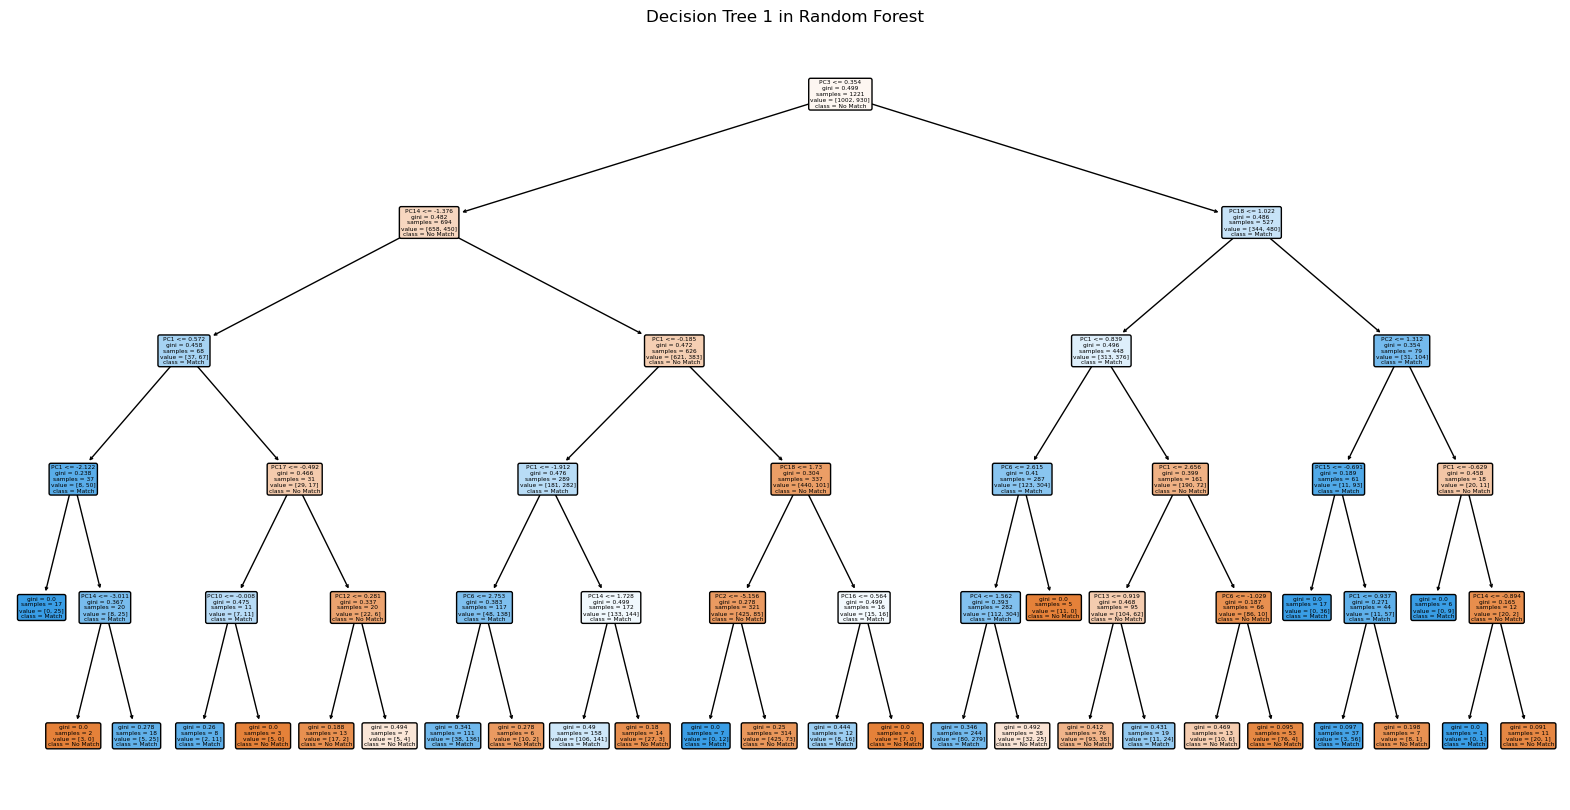

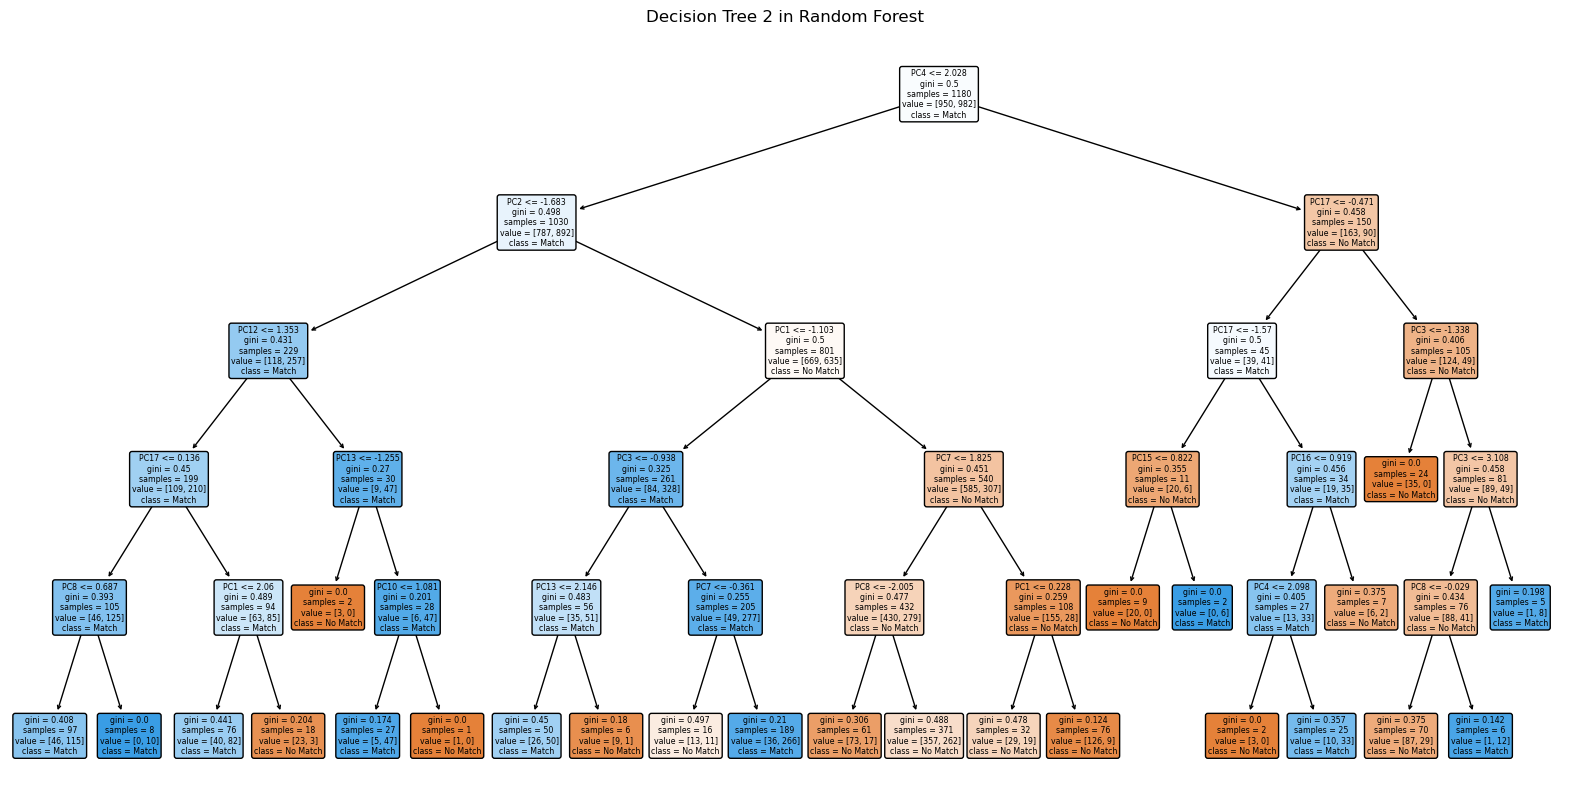

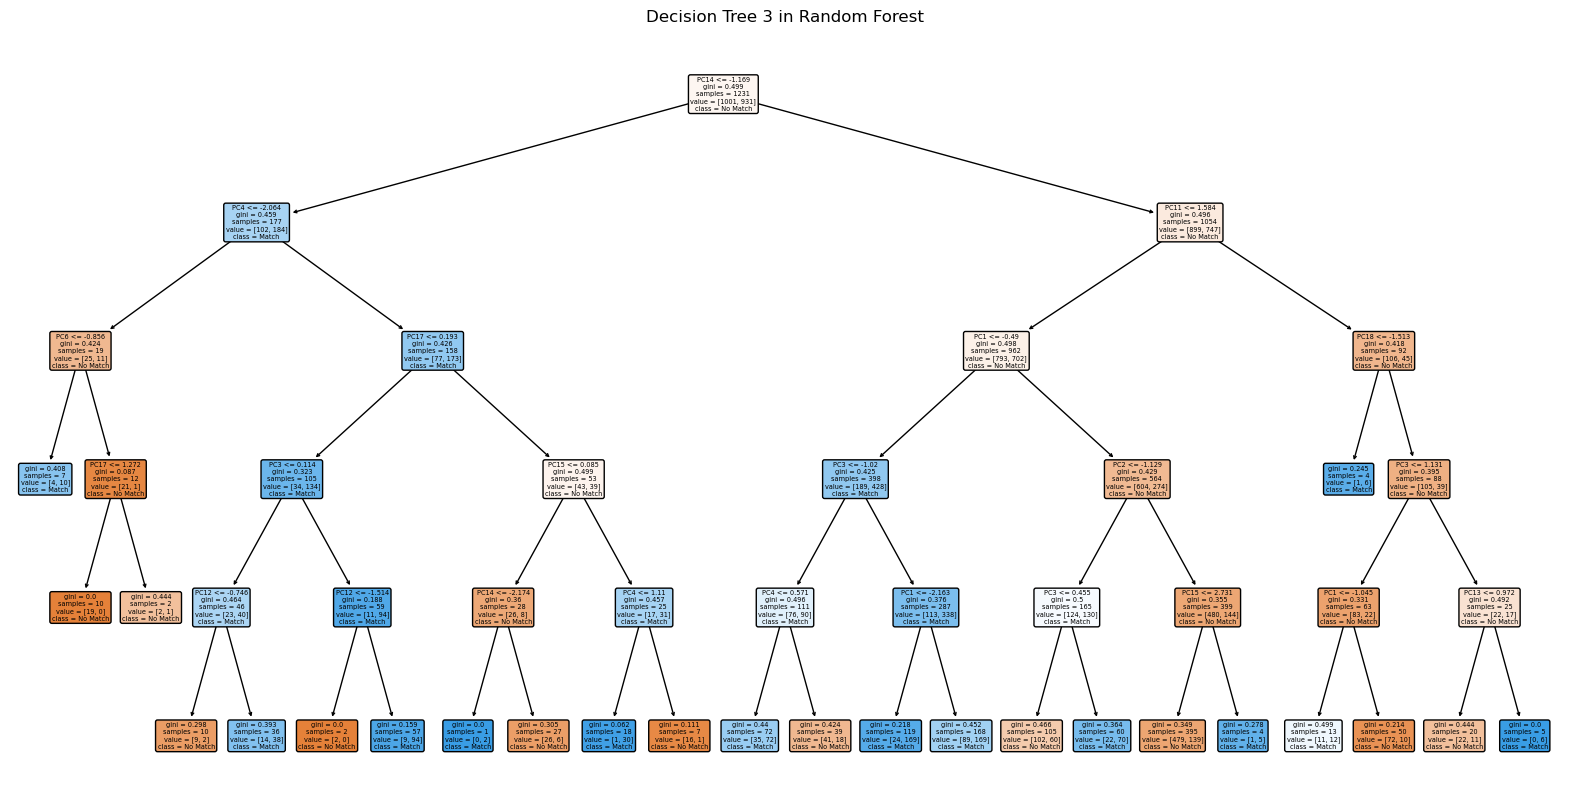

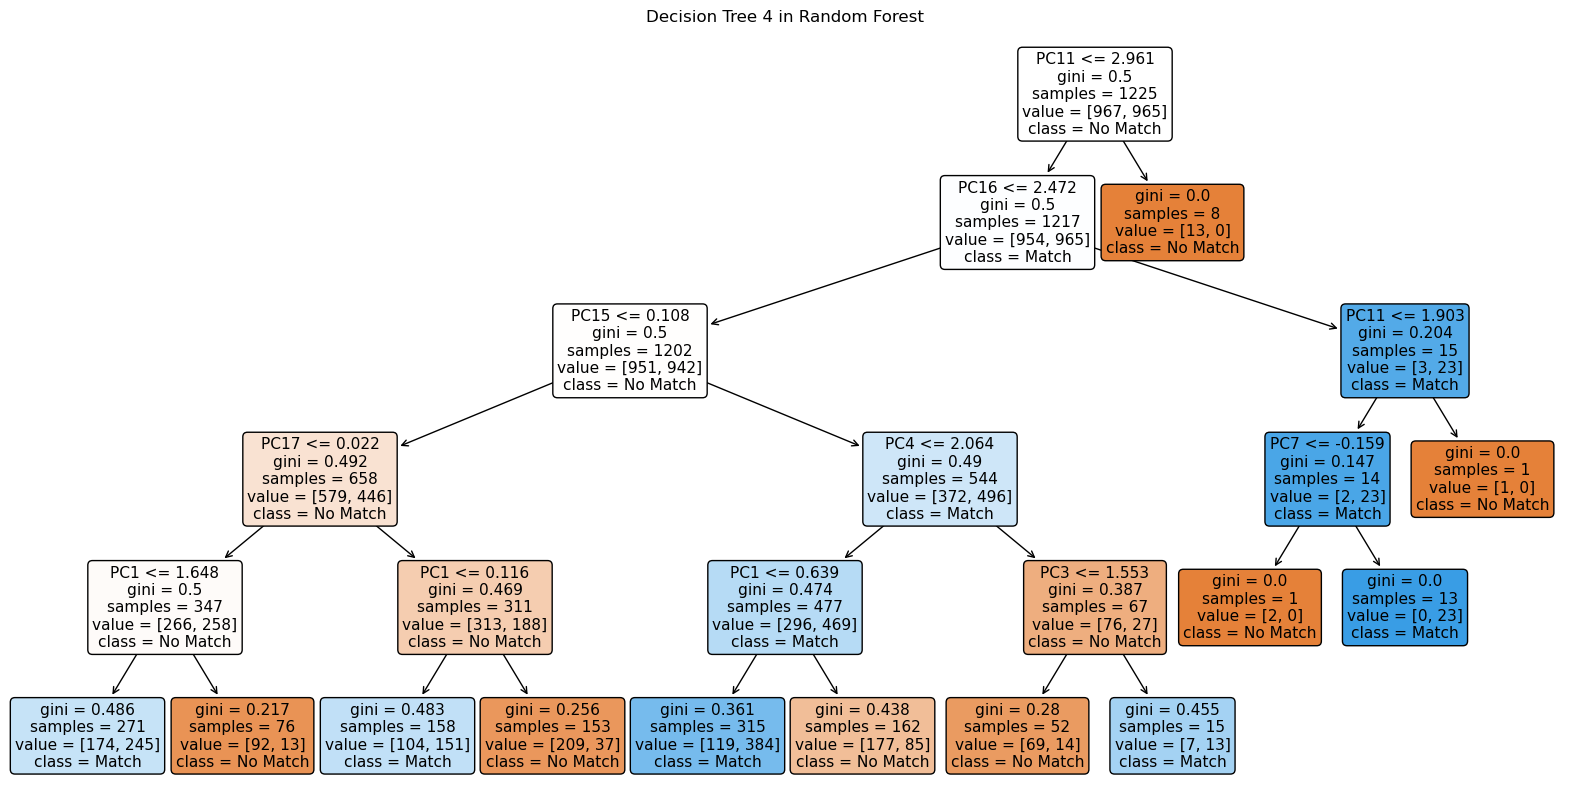

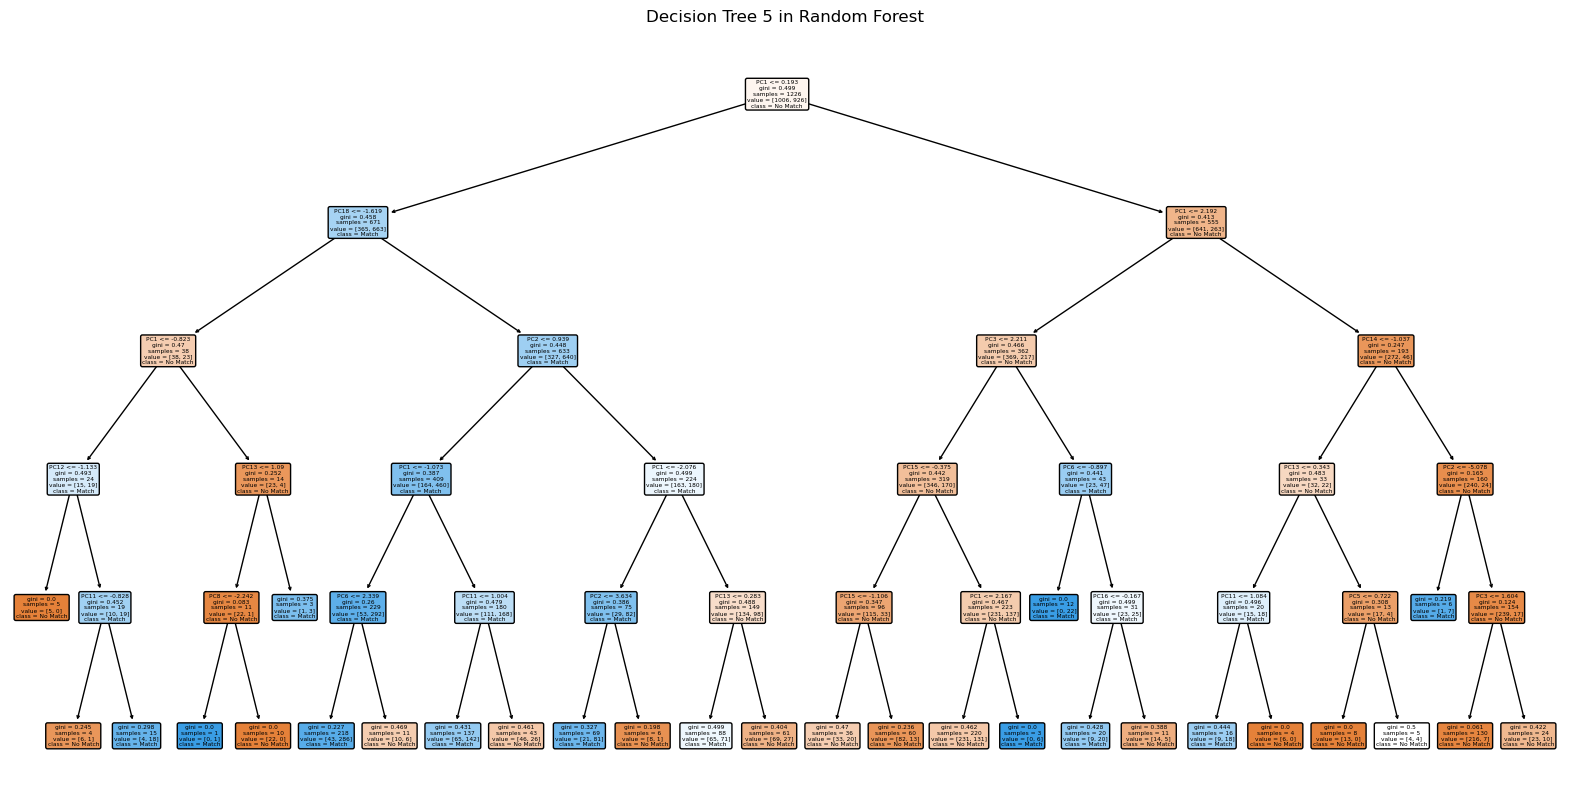

In [7]:
# THIS JUST PLOTS THE TREE DIAGRAMS FOR TREEE VISUALS LOL

'''
# Plot all trees in the Random Forest
for i, tree in enumerate(rf_model.estimators_[:5]):  #only shows first five
    plt.figure(figsize=(20, 10))
    plot_tree(
        tree,
        feature_names=X_train.columns, 
        class_names=["No Match", "Match"], 
        filled=True,
        rounded=True
    )
    plt.title(f"Decision Tree {i+1} in Random Forest")
    plt.show()
'''

In [13]:
# FINDS OPTIMAL PARAMETERS FOR RANDOM FOREST WITH STRATIFIED K-FOLD CLUSTERING

'''
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 20],
    'min_samples_split': [5, 20],
    'min_samples_leaf': [2, 20],
    'max_features': ['sqrt']
}
rf = RandomForestClassifier(random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=skf, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters with StratifiedKFold: ", grid_search.best_params_)
print("Best cross-validated accuracy: %.4f" % grid_search.best_score_)
'''

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters with StratifiedKFold:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}
Best cross-validated accuracy: 0.7526


In [55]:
# TESTING RANDOM FOREST WITH DIFFF SEEDS TO SEE IF MODEL IS PRETTY ACCURATE WITH RANDOM SEEDS INCORPORATED
# YES. YES IT WAS.

'''

selected_features = [
    'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'
]

X = data[selected_features]
y = data['match']

#runs function to evaluate model at different seed
def evaluate_model(random_seed):
    # Split the data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        max_features='sqrt',
        min_samples_split=10,
        min_samples_leaf=1,
        random_state=random_seed
    )
    
    #trains the model
    model.fit(X_train, y_train)
    
    #predictions are made
    y_pred = model.predict(X_test)
    
    #accuracy stored in list
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Run the model with multiple random seeds and store the results
seeds = [0, 42, 123, 10, 56]  
accuracies = []

for seed in seeds:
    accuracy = evaluate_model(seed)
    accuracies.append(accuracy)

print("Accuracies with different random seeds:", accuracies)

#calculated for more stats to see between accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")
'''


Accuracies with different random seeds: [0.7445652173913043, 0.7409420289855072, 0.7318840579710145, 0.7554347826086957, 0.730072463768116]
Mean Accuracy: 0.7405797101449275
Standard Deviation: 0.009194621406122835


In [226]:
# CHECKED PARAMETERS FOR TEH F1 SCORE TO CHANGE

'''
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=0)

# Set up stratified 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_f1 = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=skf, scoring='f1', n_jobs=-1, verbose=2)
grid_search_f1.fit(X_train, y_train)
print("Best params (F1):", grid_search_f1.best_params_)
print("Best F1 score:", grid_search_f1.best_score_)
'''

# RESULTS GIVE THAT ADJUSTING TO F1 SCORE REGARDLES DOES NOT HELP - MANUALLY DELETE THE NO-MATCH ROWS'''

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [17]:
#CROSS-VALIDATION ACCURACY CHECK FOR RANDOM FOREST MODEL
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))

Cross-validation accuracy: 0.73 ± 0.02


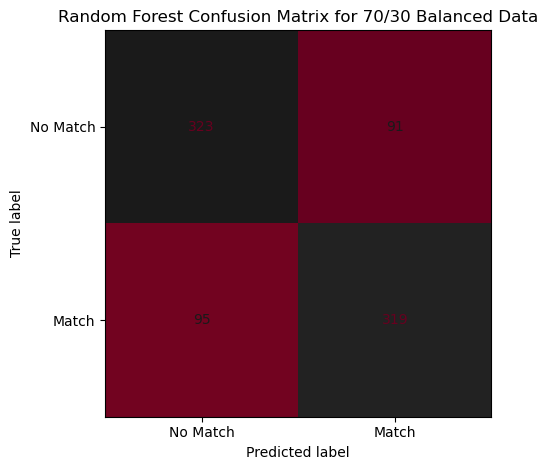

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       414
           1       0.78      0.77      0.77       414

    accuracy                           0.78       828
   macro avg       0.78      0.78      0.78       828
weighted avg       0.78      0.78      0.78       828



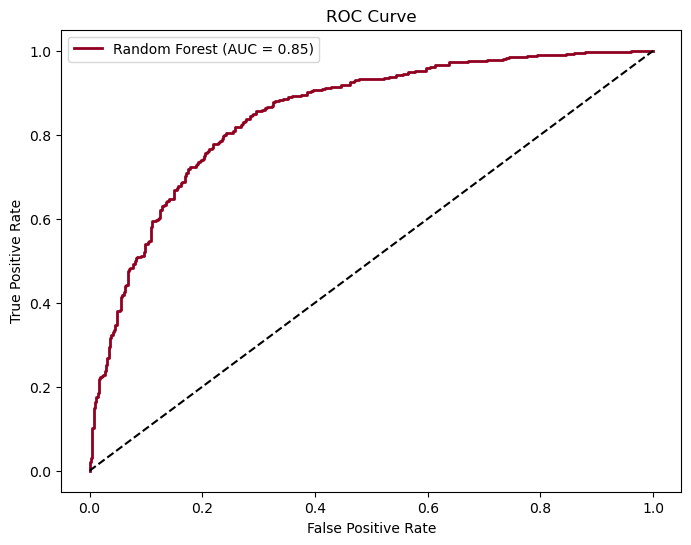

In [49]:
#GIVES CONFUSION MATRICES, AND ALL THAT JAZZ TO SEE MODEL PERFORMANCE PARAMETERS

# Confusion matrix
cm = confusion_matrix(y_test, predict_test_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Just some customizations to match theme
disp.plot(cmap='RdGy', values_format='d', colorbar=False)
plt.xticks(ticks=[0, 1], labels=['No Match', 'Match'], rotation=0)
plt.yticks(ticks=[0, 1], labels=['No Match', 'Match'], rotation=0)
plt.title("Random Forest Confusion Matrix for 70/30 Balanced Data")
plt.tight_layout()  
plt.show()

# Classification report (includes precision, recall, f1-score)
print("Random Forest Classification Report:")
print(classification_report(y_test, predict_test_rf))

# ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]  # get probabilities for class 1 here
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#900020', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


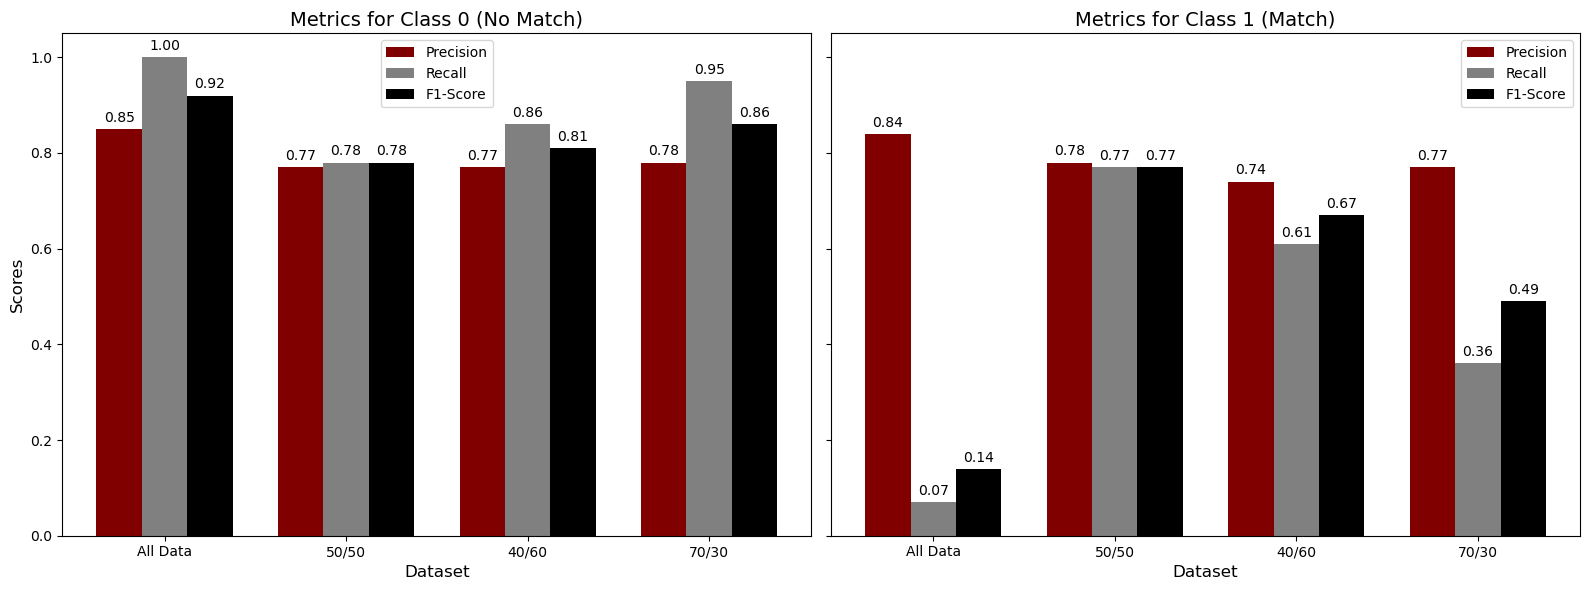

In [27]:
# MORE GRAPHS TO SHOW DIFFERENCES IN MODEL BEHAVIOUR FOR CLASS VERSUS NO CLASS

datasets = ["All Data", "50/50", "40/60", "70/30"]

# Metrics for Class 0
precision_class_0 = [0.85, 0.77, 0.77, 0.78]  
recall_class_0 = [1.00, 0.78, 0.86, 0.95]     
f1_score_class_0 = [0.92, 0.78, 0.81, 0.86]   

# Metrics for Class 1
precision_class_1 = [0.84, 0.78, 0.74, 0.77]  
recall_class_1 = [0.07, 0.77, 0.61, 0.36]     
f1_score_class_1 = [0.14, 0.77, 0.67, 0.49]   

# Make bar graphs look pretty
def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
x = np.arange(len(datasets))  
width = 0.25  

bars0_1 = ax[0].bar(x - width, precision_class_0, width, label='Precision', color='maroon')
bars0_2 = ax[0].bar(x, recall_class_0, width, label='Recall', color='grey')
bars0_3 = ax[0].bar(x + width, f1_score_class_0, width, label='F1-Score', color='black')

# labelling and titles for Class 0
ax[0].set_xlabel("Dataset", fontsize=12)
ax[0].set_ylabel("Scores", fontsize=12)
ax[0].set_title("Metrics for Class 0 (No Match)", fontsize=14)
ax[0].set_xticks(x)
ax[0].set_xticklabels(datasets)
ax[0].legend()
annotate_bars(ax[0], bars0_1)
annotate_bars(ax[0], bars0_2)
annotate_bars(ax[0], bars0_3)

# STARTING BAR PLOTS FOR CLASS 1 - SAME FORMATTING APPLIES
bars1_1 = ax[1].bar(x - width, precision_class_1, width, label='Precision', color='maroon')
bars1_2 = ax[1].bar(x, recall_class_1, width, label='Recall', color='grey')
bars1_3 = ax[1].bar(x + width, f1_score_class_1, width, label='F1-Score', color='black')

# labelling and titles for Class 0
ax[1].set_xlabel("Dataset", fontsize=12)
ax[1].set_title("Metrics for Class 1 (Match)", fontsize=14)
ax[1].set_xticks(x)
ax[1].set_xticklabels(datasets)
ax[1].legend()
annotate_bars(ax[1], bars1_1)
annotate_bars(ax[1], bars1_2)
annotate_bars(ax[1], bars1_3)

plt.tight_layout()
plt.show()


attractive_o                0.113522
funny_o                     0.109523
like                        0.104391
shared_interests_o          0.080279
attractive_partner          0.075544
guess_prob_liked            0.069575
funny_partner               0.069525
shared_interests_partner    0.059267
intelligence_o              0.025412
sinsere_o                   0.021645
dtype: float64


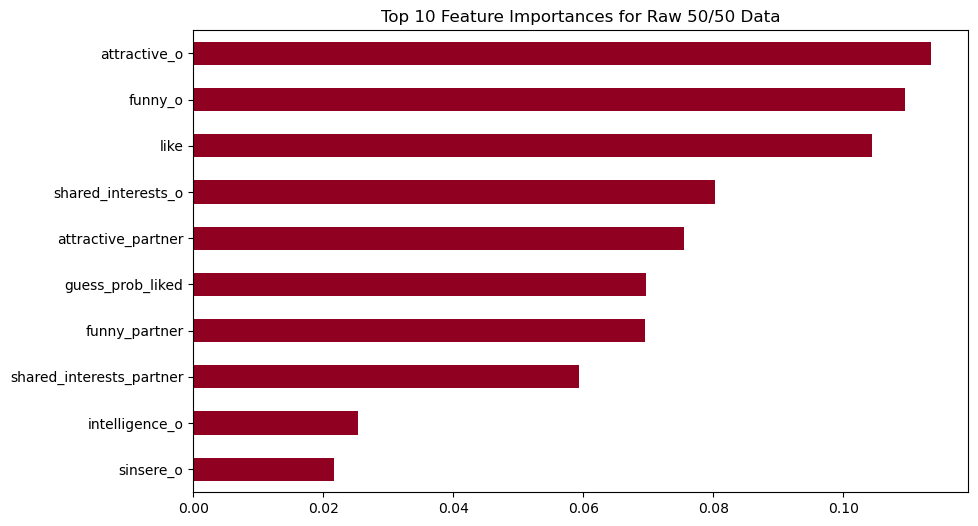

In [50]:
#EXTRACTING FEATURE IMPORTANCE FROM MODEL

importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

#gives the top 10 features
print(feat_importance.head(10))

plt.figure(figsize=(10,6))
feat_importance.head(10).plot(kind='barh', color = '#900020')
plt.title('Top 10 Feature Importances for Raw 50/50 Data')
plt.gca().invert_yaxis()
plt.show()


In [10]:
#PERMUTATION IMPORTANCE

perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color="red")
plt.title("Permutation Importance")
plt.show()



KeyboardInterrupt



In [52]:
#GETS SHAP VALUES TO SEE HOW MUCH EACH FEATURE CONTRIBUTES TO EACH INDIVIDUAL PREDICTION

explainer = shap.PermutationExplainer(rf_model.predict, X_test)
shap_values = explainer(X_test)


PermutationExplainer explainer: 829it [10:18,  1.32it/s]                         


TypeError: bad operand type for abs(): 'Explanation'

C:\Users\zarak\AppData\Local\Temp\ipykernel_23984\563561887.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X_test,  max_display=5, cmap=cmap)


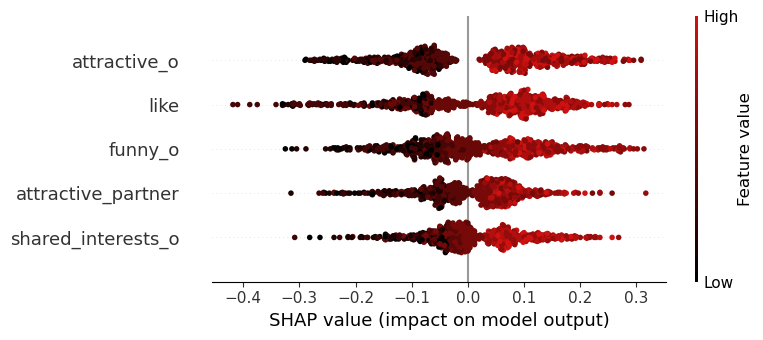

In [57]:
#SUMMARY PLOT FOR THE SHAP VALUES

colors = ['#000000', '#D01110']  # maroon to black
cmap = LinearSegmentedColormap.from_list('maroon_black', colors)

shap.summary_plot(shap_values.values, X_test,  max_display=5, cmap=cmap)

In [ ]:
''' XGB BOOST MODEL BELOW

In [39]:
#Xgboost model implemented with sciket
'''
model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))
'''

Training Accuracy: 0.8742236024844721
Validation Accuracy: 0.7572463768115942


In [81]:
#Better Model with Parameters'''

'''
model = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.05,
    max_depth = 2,
    min_samples_split = 5,
    min_samples_leaf = 5,
    subsample = 0.8,
    max_features= 'sqrt'
)

rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))
'''

Training Accuracy: 0.8038302277432712
Validation Accuracy: 0.7536231884057971


In [69]:
#FINE-TUNING THE Gradient Boosting '''

'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=skf, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")
'''

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validated accuracy: 0.7572492000374877


In [53]:
#CROSS-VALIDATION
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))

Cross-validation accuracy: 0.74 ± 0.02


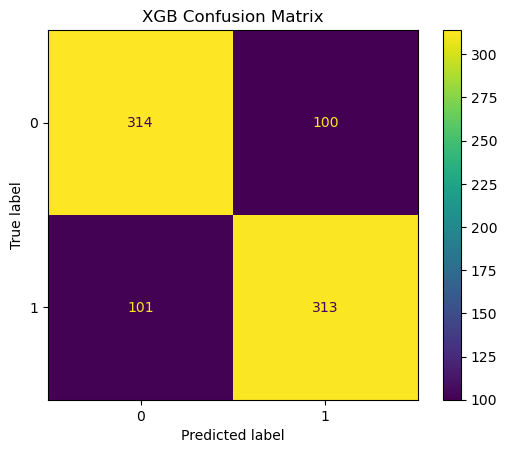

XGB Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       414
           1       0.76      0.76      0.76       414

    accuracy                           0.76       828
   macro avg       0.76      0.76      0.76       828
weighted avg       0.76      0.76      0.76       828



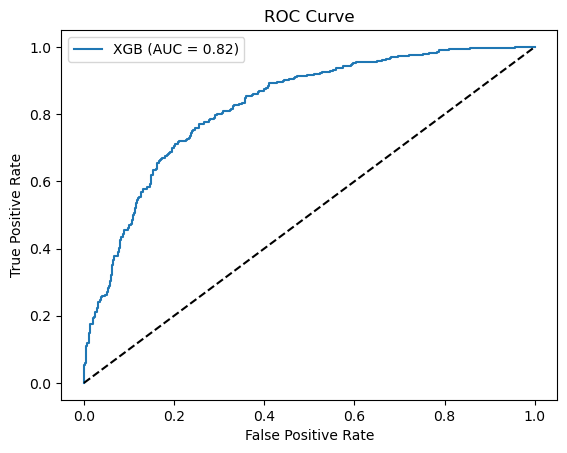

In [82]:
#CONFUSION MATRICES AND PERFORMANCE PARAMETERS FOR THE MODEL

'''
# Confusion matrix
cm = confusion_matrix(y_test, predict_test_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("XGB Confusion Matrix")
plt.show()

# Classification report (includes precision, recall, f1-score)
print("XGB Classification Report:")
print(classification_report(y_test, predict_test_xgb))

# ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]  # get probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'XGB (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
'''

In [152]:
'''LOOK BELOW FOR MODEL COMPARISONS AND DISCUSSION'''

'''PICKING RANDOM FOREST BECAUSE FOR BIGGER DATASETS IT WILL TRAIN FASTER AND WITH MORE MINIMAL
ERROR THERE TOO SINCE THE GRADIENT BOOST DESCENT GOES DOWN LINEARLITY AND NOT EXPONENTIALLY'''

SyntaxError: incomplete input (175655803.py, line 1)

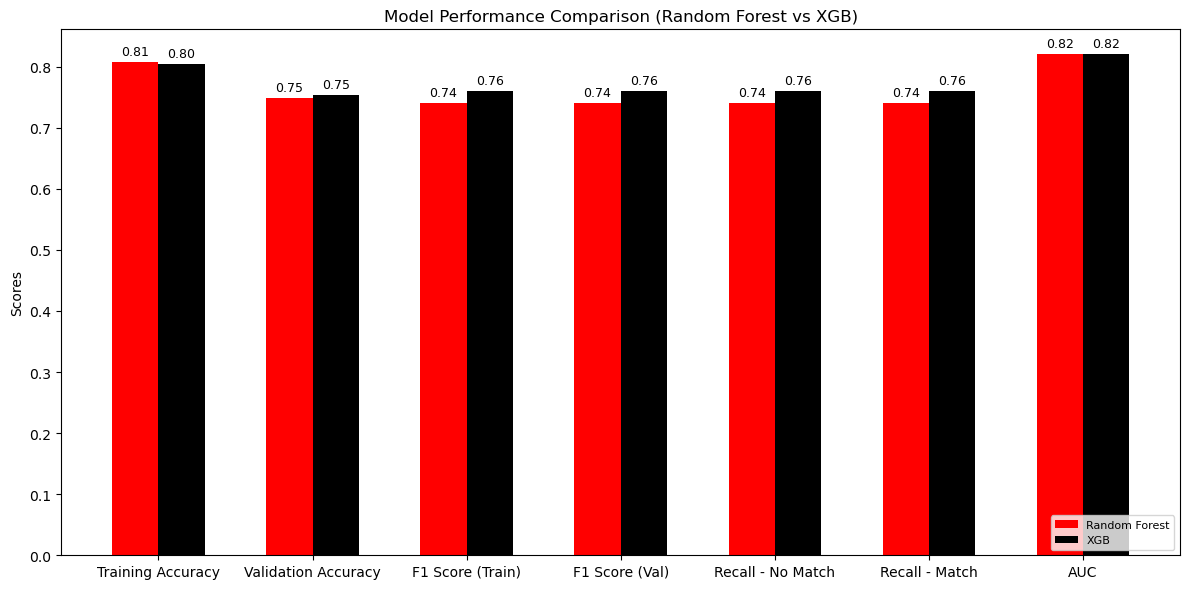

In [86]:
# CREATING COMPARISON PLOTS BELOW

'''
# Data for Random Forest
train_acc_rf = 0.8074534161490683
val_acc_rf = 0.748792270531401
train_f1_rf = 0.74
val_f1_rf = 0.74
auc_rf = 0.82
recall_1_nomatch = 0.74
recall_1_match = 0.74

# Data for XGB (Gradient Boosting)
train_acc_xgb = 0.8038302277432712
val_acc_xgb = 0.7536231884057971
train_f1_xgb = 0.76
val_f1_xgb = 0.76
auc_xgb = 0.82
recall_2_nomatch = 0.76
recall_2_match = 0.76

# STARTING TO PLOT HERE
labels = ['Training Accuracy', 'Validation Accuracy', 'F1 Score (Train)', 'F1 Score (Val)', 
          'Recall - No Match', 'Recall - Match', 'AUC']
rf_values = [train_acc_rf, val_acc_rf, train_f1_rf, val_f1_rf, recall_1_nomatch, recall_1_match, auc_rf]
xgb_values = [train_acc_xgb, val_acc_xgb, train_f1_xgb, val_f1_xgb, recall_2_nomatch, recall_2_match, auc_xgb]

x = np.arange(len(labels))  # the label locations
width = 0.3  # smaller bar width for more space

fig, ax = plt.subplots(figsize=(12, 6))  # larger figure size for better spacing

rects1 = ax.bar(x - width/2, rf_values, width, label='Random Forest', color='r')
rects2 = ax.bar(x + width/2, xgb_values, width, label='XGB', color='k')


ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison (Random Forest vs XGB)')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)  # reduce x-label font size
ax.legend(loc='lower right', fontsize=8)  # smaller legend, positioned top-right

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)  # smaller font for labels

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()
'''

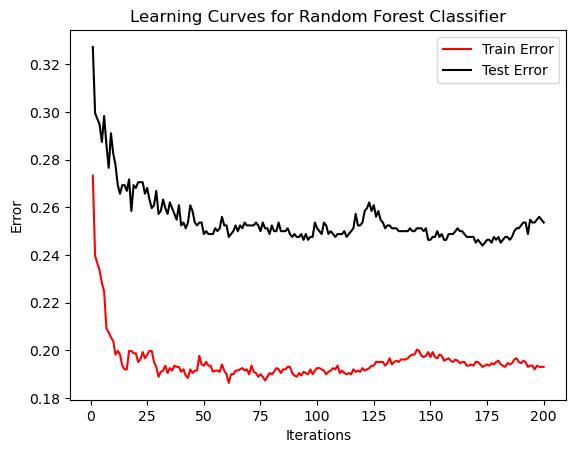

In [88]:
#PLOTTING OF THE LEARNING CURVES


# Function to plot learning curves
def plot_learning_curve(model, X_train, y_train, X_test, y_test, model_name):
    train_errors, test_errors = [], []
    
    # For GradientBoostingClassifier - iterates through
    if isinstance(model, GradientBoostingClassifier):
        for stage_predict in model.staged_predict(X_train):
            train_errors.append(1 - metrics.accuracy_score(y_train, stage_predict))
        
        for stage_predict in model.staged_predict(X_test):
            test_errors.append(1 - metrics.accuracy_score(y_test, stage_predict))
    
    # For RandomForestClassifier - cross-validates and iterates
    elif isinstance(model, RandomForestClassifier):
        n_estimators = model.n_estimators
        for i in range(1, n_estimators + 1):
            model.set_params(n_estimators=i)
            model.fit(X_train, y_train)
            
            train_errors.append(1 - metrics.accuracy_score(y_train, model.predict(X_train))) #get training error
            
            test_errors.append(1 - metrics.accuracy_score(y_test, model.predict(X_test))) #get testing error

    # plotting the learning curve
    plt.plot(range(1, len(train_errors) + 1), train_errors, label="Train Error", color="red")
    plt.plot(range(1, len(test_errors) + 1), test_errors, label="Test Error", color="black")
    plt.title(f"Learning Curves for {model_name}")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

#UNCOMMENT HERE TO SEE THE GRADIENTBOOSTING LEARNING CURVE
'''
# GradientBoostingClassifier model with learning curves
gb_model = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.05,
    max_depth = 2,
    min_samples_split = 5,
    min_samples_leaf = 5,
    subsample = 0.8,
    max_features= 'sqrt'
)

gb_model.fit(X_train, y_train)
plot_learning_curve(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting Classifier")

'''
#CAN COMMENT OUT TO THEN UNCOMMENT THE ABOVE SECTION 

# RandomForestClassifier model with learning curves
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,  # Aligned with GB
    max_features='sqrt',
    min_samples_split=10,  # Aligned with GB
    min_samples_leaf=1,  # Aligned with GB
    random_state=0
)
rf_model.fit(X_train, y_train)
plot_learning_curve(rf_model, X_train, y_train, X_test, y_test, "Random Forest Classifier")
